데이터 로드 성공!
   Row ID        Order ID Order Date  Year  Month  Day Ship Date  \
0       1  CA-2016-152156    11/8/16  2016     11    8  11/11/16   
1       2  CA-2016-152156    11/8/16  2016     11    8  11/11/16   
2       3  CA-2016-138688    6/12/16  2016      6   12   6/16/16   
3       4  US-2015-108966   10/11/15  2015     10   11  10/18/15   
4       5  US-2015-108966   10/11/15  2015     10   11  10/18/15   

        Ship Mode Customer ID    Customer Name  ... Discount    Profit  \
0    Second Class    CG-12520      Claire Gute  ...     0.00   41.9136   
1    Second Class    CG-12520      Claire Gute  ...     0.00  219.5820   
2    Second Class    DV-13045  Darrin Van Huff  ...     0.00    6.8714   
3  Standard Class    SO-20335   Sean O'Donnell  ...     0.45 -383.0310   
4  Standard Class    SO-20335   Sean O'Donnell  ...     0.20    2.5164   

  Unnamed: 24 Unnamed: 25                                     Product Name.1  \
0         NaN         NaN  "While you Were Out" Message

/var/folders/l5/_d7slpkx5bn04y8lk24k5l040000gn/T/ipykernel_33737/2363503818.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


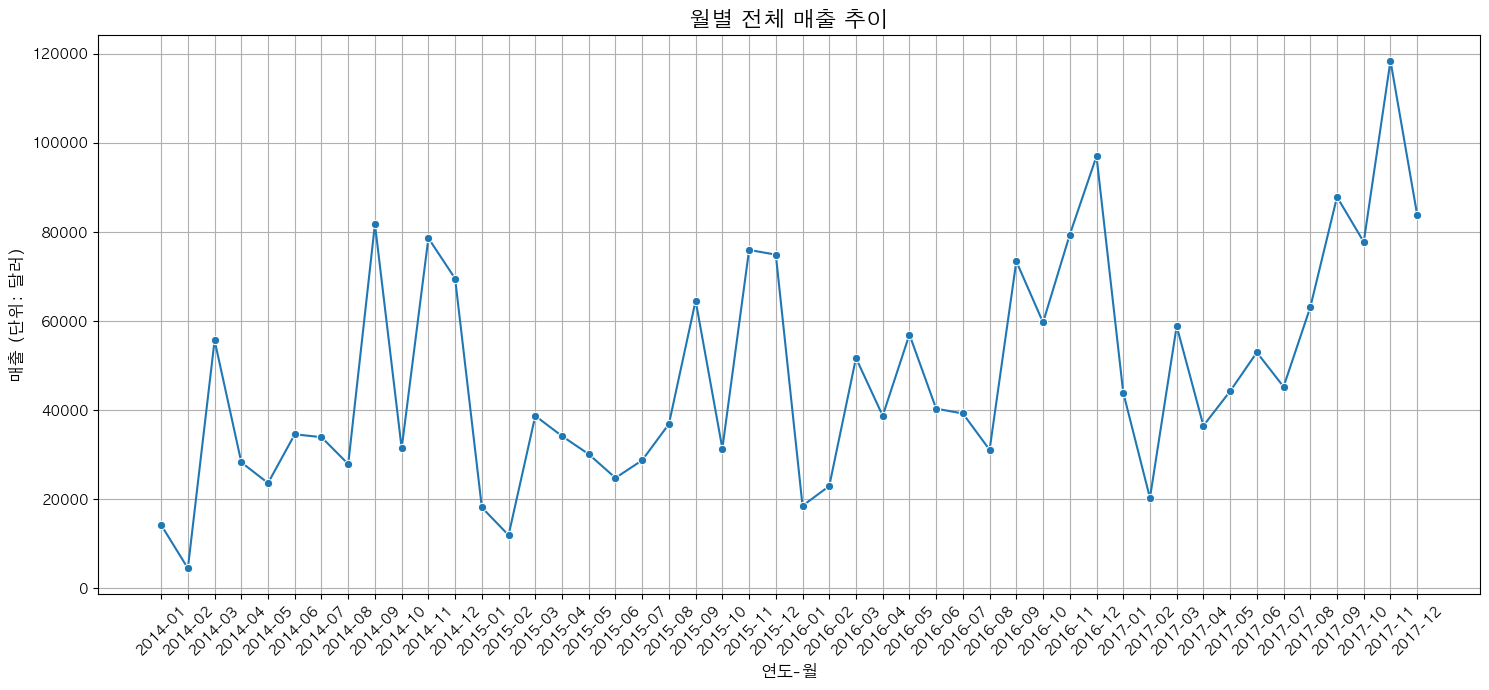

/var/folders/l5/_d7slpkx5bn04y8lk24k5l040000gn/T/ipykernel_33737/2363503818.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')


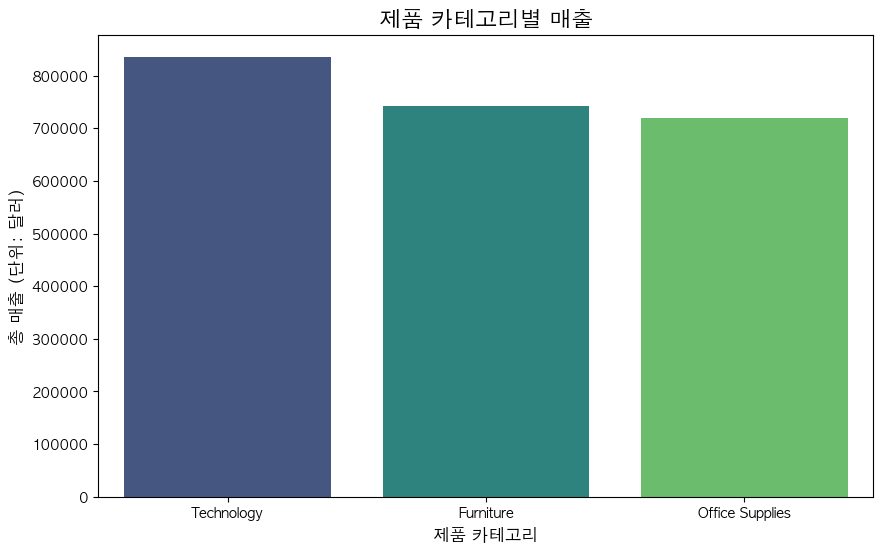

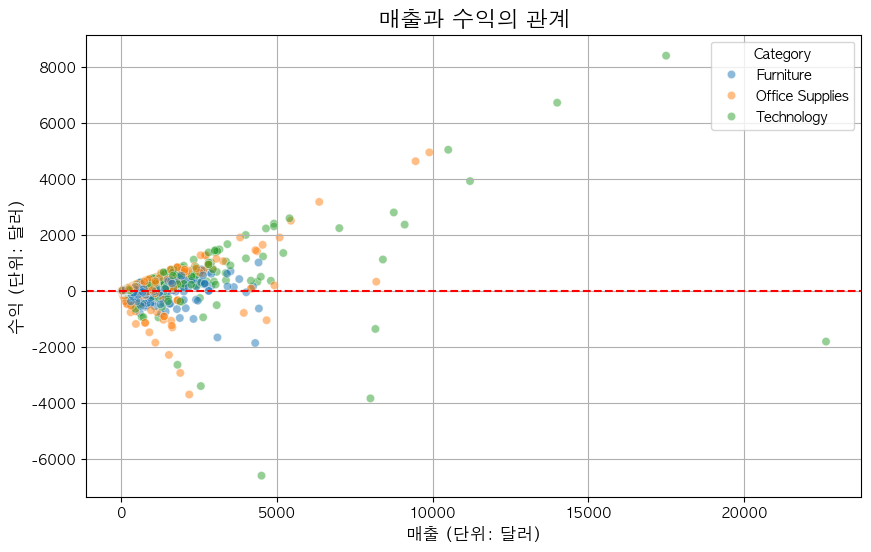

/var/folders/l5/_d7slpkx5bn04y8lk24k5l040000gn/T/ipykernel_33737/2363503818.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='plasma')


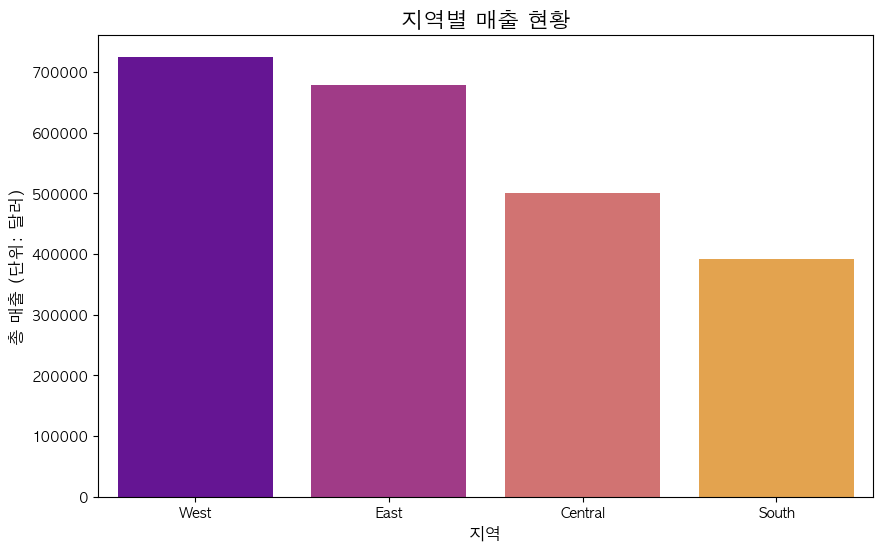

In [1]:
# -*- coding: utf-8 -*-
# # Super Store 데이터 시각화

# 이 노트북은 Super Store 판매 데이터를 시각화하여 데이터에 대한 이해를 돕는 것을 목표로 합니다.
# 다양한 그래프를 통해 매출 추이, 카테고리별 현황, 수익성 등 다각적인 분석을 수행합니다.

# ## 1. 라이브러리 및 데이터 로드

# ### 라이브러리 임포트
# - `pandas`: 데이터 조작 및 분석을 위한 필수 라이브러리입니다.
# - `matplotlib.pyplot`: 데이터 시각화를 위한 가장 기본적인 라이브러리입니다.
# - `seaborn`: Matplotlib을 기반으로 더 아름답고 통계적으로 유의미한 그래프를 그릴 수 있게 도와주는 라이브러리입니다.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ### 한글 폰트 설정 (Mac OS 사용자용)
# Matplotlib에서 한글 깨짐 현상을 방지하기 위해 한글 폰트를 설정합니다.
# AppleGothic은 Mac OS에 기본적으로 설치된 폰트입니다.
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# ### 데이터 로드
# `Preprocessing.csv` 파일을 pandas DataFrame으로 읽어옵니다.
# 파일 경로가 올바른지 확인해주세요.
try:
    df = pd.read_csv('/Users/hataeho/Desktop/prac/pythondataworkspace/Yee/Preprocessing.csv')
    # 데이터의 처음 5개 행을 출력하여 데이터를 확인합니다.
    print("데이터 로드 성공!")
    print(df.head())
except FileNotFoundError:
    print("파일을 찾을 수 없습니다. 파일 경로를 확인해주세요.")

# ## 2. 데이터 전처리

# ### 날짜 데이터 변환
# 'Order Date' 열을 문자열에서 날짜/시간(datetime) 객체로 변환합니다.
# 이를 통해 시간 기반의 분석(시계열 분석)이 가능해집니다.
df['Order Date'] = pd.to_datetime(df['Order Date'])

# ### 월별 데이터 추출
# 'Order Date'에서 연도와 월을 추출하여 'YearMonth' 열을 새로 만듭니다.
# 이는 월별 매출 추이를 분석하는 데 사용됩니다.
df['YearMonth'] = df['Order Date'].dt.to_period('M')

# ## 3. 데이터 시각화

# ### 시각화 1: 월별 전체 매출 추이
# - **목적**: 시간에 따른 매출의 변화 패턴(증가, 감소, 계절성 등)을 파악합니다.
# - **그래프 종류**: 라인 그래프 (시계열 데이터를 표현하는 데 가장 적합)

# 월별 매출 합계를 계산합니다.
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str) # 시각화를 위해 문자열로 변환

plt.figure(figsize=(15, 7))
sns.lineplot(x='YearMonth', y='Sales', data=monthly_sales, marker='o')
plt.title('월별 전체 매출 추이', fontsize=16)
plt.xlabel('연도-월', fontsize=12)
plt.ylabel('매출 (단위: 달러)', fontsize=12)
plt.xticks(rotation=45) # x축 라벨이 겹치지 않도록 회전
plt.grid(True) # 가독성을 높이기 위해 그리드 추가
plt.tight_layout() # 그래프가 잘리지 않도록 레이아웃 조정
plt.show()

# ### 시각화 2: 제품 카테고리별 매출
# - **목적**: 어떤 제품 카테고리가 가장 많은 매출을 올리는지 파악하여 주력 상품군을 식별합니다.
# - **그래프 종류**: 막대 그래프 (범주형 데이터 간의 크기를 비교하는 데 효과적)

# 카테고리별 매출 합계를 계산하고, 매출액 순으로 정렬합니다.
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.title('제품 카테고리별 매출', fontsize=16)
plt.xlabel('제품 카테고리', fontsize=12)
plt.ylabel('총 매출 (단위: 달러)', fontsize=12)
plt.show()

# ### 시각화 3: 매출과 수익의 관계
# - **목적**: 각 거래의 매출액과 수익률을 비교하여 수익 구조를 분석합니다. 이를 통해 어떤 상품이 고수익을 내는지, 혹은 매출만 높고 수익성은 낮은지를 파악할 수 있습니다.
# - **그래프 종류**: 산점도 (두 연속형 변수 간의 관계를 파악하는 데 유용)

plt.figure(figsize=(10, 6))
# alpha 값을 조절하여 점들이 겹치는 부분의 밀도를 시각적으로 표현합니다.
sns.scatterplot(x='Sales', y='Profit', data=df, alpha=0.5, hue='Category')
plt.title('매출과 수익의 관계', fontsize=16)
plt.xlabel('매출 (단위: 달러)', fontsize=12)
plt.ylabel('수익 (단위: 달러)', fontsize=12)
plt.axhline(0, color='red', linestyle='--') # 수익이 0인 지점을 기준으로 선을 그어 수익/손실 영역을 구분
plt.grid(True)
plt.show()

# ### 시각화 4: 지역별 매출 현황
# - **목적**: 지역별 매출을 비교하여 어느 지역에 마케팅 및 판매 전략을 집중해야 할지 결정하는 데 도움을 줍니다.
# - **그래프 종류**: 막대 그래프 (지역별 매출 크기를 명확하게 비교)

# 지역별 매출 합계를 계산하고, 매출액 순으로 정렬합니다.
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='plasma')
plt.title('지역별 매출 현황', fontsize=16)
plt.xlabel('지역', fontsize=12)
plt.ylabel('총 매출 (단위: 달러)', fontsize=12)
plt.show()
